In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import datetime
import warnings
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report,roc_curve


warnings.filterwarnings('ignore')

# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'


In [2]:
#%%time
train_csv = "primary_play_h2o_first.csv"
train = pd.read_csv(train_csv,encoding = "ISO-8859-1")
train_backup=train.copy()

In [3]:
train.shape

(246, 10)

In [4]:
train.drop(['Competition','Opportunity_Source'],axis = 1,inplace = True)

In [5]:
train.columns

Index(['Region', 'Subregion', 'Endcustomercountry', 'Endcustomerindustry',
       'Partner', 'Offering_type', 'Primary_Play', 'Who_did_Genesys_Replace'],
      dtype='object')

In [6]:
labeldict=[]

leregion = LabelEncoder()
train['Region'].replace([np.nan],['NaN_state'], inplace=True)
train['Region'] = leregion.fit_transform(train['Region'].astype(object))

lesubregion = LabelEncoder()
train['Subregion'].replace([np.nan],['NaN_state'], inplace=True)
train['Subregion'] = lesubregion.fit_transform(train['Subregion'].astype(object))

leendcustomercountry = LabelEncoder()
train['Endcustomercountry'].replace([np.nan],['NaN_state'], inplace=True)
train['Endcustomercountry'] = leendcustomercountry.fit_transform(train['Endcustomercountry'].astype(object))

leendcustomerindustry = LabelEncoder()
train['Endcustomerindustry'].replace([np.nan],['NaN_state'], inplace=True)
train['Endcustomerindustry'] = leendcustomerindustry.fit_transform(train['Endcustomerindustry'].astype(object))

lepartner = LabelEncoder()
train['Partner'].replace([np.nan],['NaN_state'], inplace=True)
train['Partner'] = lepartner.fit_transform(train['Partner'].astype(object))

leofferingtype = LabelEncoder()
train['Offering_type'].replace([np.nan],['NaN_state'], inplace=True)
train['Offering_type'] = leofferingtype.fit_transform(train['Offering_type'].astype(object))

leprimaryplay = LabelEncoder()
train['Primary_Play'].replace([np.nan],['NaN_state'], inplace=True)
train['Primary_Play'] = leprimaryplay.fit_transform(train['Primary_Play'].astype(object))

lereplace = LabelEncoder()
train['Who_did_Genesys_Replace'].replace([np.nan],['NaN_state'], inplace=True)
train['Who_did_Genesys_Replace'] = lereplace.fit_transform(train['Who_did_Genesys_Replace'].astype(object))


labeldict={"Region":leregion,"Subregion":lesubregion,"Endcustomercountry":leendcustomercountry,
           "Endcustomerindustry":leendcustomerindustry,"Partner":lepartner,"Offering_type":leofferingtype,
           "Primary_Play":leprimaryplay,"Who_did_Genesys_Replace":lereplace}


output = open('sales_xgb_models_data_processing.pkl', 'wb')
pickle.dump(labeldict, output)
output.close()

In [7]:
for key,value in labeldict.items():
    print("\n"+key)
    print(list(value.inverse_transform(list(train[key].unique()))))
    print(list(train[key].unique()))



Region
['North America ', 'EMEA ', 'LATAM ', 'APAC ']
[3, 1, 2, 0]

Subregion
['West-Mid-Market', 'Canada-Commercial', 'South Africa-Mid-Market', 'Benelux-Mid-Market', 'UKI-Enterprise', 'East-Enterprise', 'Italy & Middle East-Enterprise', 'Southern Cone-Commercial', 'ANZ-Mid-Market', 'Velocity-Velocity', 'Central-Enterprise', 'Iberia-Enterprise', 'ECSEI-Mid-Market', 'DACH-Enterprise', 'France and N. Africa-Enterprise', 'ECSEI-Enterprise', 'Nordics-Commercial', 'South Africa-Enterprise', 'Southern Cone-Enterprise', 'Italy & Middle East-Commercial', 'Greater China-Mid-Market', 'Italy & Middle East-Mid-Market', 'Italy & Middle East-All', 'ANZ-Enterprise', 'Greater China-Enterprise', 'Brazil-Commercial', 'Mexico-Commercial', 'Brazil-Enterprise', 'UKI-Mid-Market', 'Andean-Commercial', 'France and N. Africa-Mid-Market', 'South East Asia-Enterprise', 'Mexico-Enterprise', 'UKI-Commercial', 'Central-Commercial', 'East-Commercial', 'DACH-All', 'DACH-Mid-Market', 'DACH-Commercial', 'South Korea-

In [8]:
train

,Region,Subregion,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Primary_Play,Who_did_Genesys_Replace
0,3,57,41,22,44,2,6,7
1,3,11,6,4,104,1,6,7
2,1,45,27,8,99,5,1,15
3,1,6,30,18,24,5,1,28
4,1,51,52,7,95,5,1,28
5,1,51,52,9,16,7,0,6
6,3,23,53,6,0,7,3,15
7,1,37,55,16,8,5,1,15
8,2,48,36,6,78,5,1,4
9,0,1,31,7,103,5,1,9


In [9]:
train1 = train.iloc[:180, :]
train2 = train.iloc[180:,:]

X_train = train1.drop(['Primary_Play'],axis=1)
y_train = train1['Primary_Play']
y_train.mean()

X_test = train2.drop(['Primary_Play'],axis=1)
y_test = train2['Primary_Play']

X_full = train.drop(['Primary_Play'],axis=1)
y_full = train['Primary_Play']

In [10]:
train1.shape

(180, 8)

In [11]:
train2.shape

(66, 8)

In [12]:
train2

,Region,Subregion,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Primary_Play,Who_did_Genesys_Replace
180,1,37,25,19,80,7,2,28
181,1,51,52,18,0,5,0,6
182,0,47,45,17,49,5,0,6
183,0,47,45,17,52,7,0,6
184,1,32,46,7,13,5,1,30
185,0,1,31,19,34,5,1,9
186,2,9,7,8,55,7,0,26
187,1,20,40,19,86,7,0,6
188,3,56,53,10,0,7,0,6
189,2,40,29,6,23,5,3,9


In [13]:
train1

,Region,Subregion,Endcustomercountry,Endcustomerindustry,Partner,Offering_type,Primary_Play,Who_did_Genesys_Replace
0,3,57,41,22,44,2,6,7
1,3,11,6,4,104,1,6,7
2,1,45,27,8,99,5,1,15
3,1,6,30,18,24,5,1,28
4,1,51,52,7,95,5,1,28
5,1,51,52,9,16,7,0,6
6,3,23,53,6,0,7,3,15
7,1,37,55,16,8,5,1,15
8,2,48,36,6,78,5,1,4
9,0,1,31,7,103,5,1,9


# XGB model

In [14]:
xgb = XGBClassifier(max_depth=9,min_child_weight=3,max_delta_step=7,
                    tree_method='exact') #-  increased the true positived but decreased overall score, which is okay!!!

xgb.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=7, max_depth=9, min_child_weight=3, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, tree_method='exact', verbosity=1)

  With train data 
Confusion Matrix
[[46  0  0  0  0  0]
 [ 0 79  0  0  0  0]
 [ 1  1 23  0  0  0]
 [ 0  1  1 11  0  0]
 [ 0  0  1  0 13  0]
 [ 0  0  0  0  0  3]]
Classificaiton report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       0.98      1.00      0.99        79
           2       0.92      0.92      0.92        25
           3       1.00      0.85      0.92        13
           4       1.00      0.93      0.96        14
           6       1.00      1.00      1.00         3

   micro avg       0.97      0.97      0.97       180
   macro avg       0.98      0.95      0.96       180
weighted avg       0.97      0.97      0.97       180

Accuracy report
0.9722222222222222


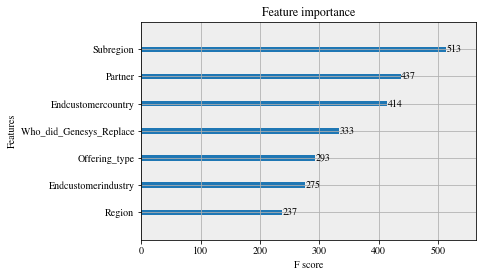

In [15]:
print('\033[1m  With train data \033[0m')
pred = xgb.predict(X_train)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_train,pred))
print("Classificaiton report")
print(classification_report(y_train,pred))

print("Accuracy report")
print(accuracy_score(y_train,pred))

# plot feature importance
xgboost.plot_importance(xgb)
plt.show()

  With test data 
Confusion Matrix
[[13  5  1  0  0  0  0]
 [ 1 23  0  2  0  0  0]
 [ 1  0  6  0  2  0  0]
 [ 0  2  0  1  0  0  0]
 [ 1  0  2  0  3  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  1  0  0  1]]
Classificaiton report
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.74      0.88      0.81        26
           2       0.67      0.67      0.67         9
           3       0.25      0.33      0.29         3
           4       0.60      0.50      0.55         6
           5       0.00      0.00      0.00         1
           6       1.00      0.50      0.67         2

   micro avg       0.71      0.71      0.71        66
   macro avg       0.58      0.51      0.53        66
weighted avg       0.71      0.71      0.71        66

Accuracy report
0.7121212121212122


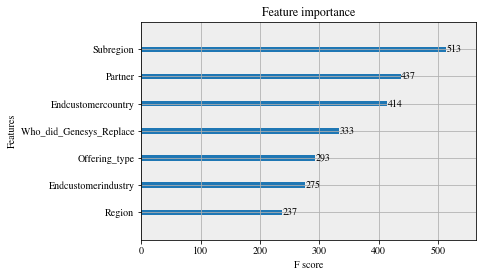

In [16]:
print('\033[1m  With test data \033[0m')
predtestxgb = xgb.predict(X_test)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_test,predtestxgb))
print("Classificaiton report")
print(classification_report(y_test,predtestxgb))

print("Accuracy report")
print(accuracy_score(y_test,predtestxgb))

# plot feature importance
xgboost.plot_importance(xgb)

  With full data 
Confusion Matrix
[[ 59   5   1   0   0   0   0]
 [  1 102   0   2   0   0   0]
 [  2   1  29   0   2   0   0]
 [  0   3   1  12   0   0   0]
 [  1   0   3   0  16   0   0]
 [  0   1   0   0   0   0   0]
 [  0   0   0   1   0   0   4]]
Classificaiton report
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        65
           1       0.91      0.97      0.94       105
           2       0.85      0.85      0.85        34
           3       0.80      0.75      0.77        16
           4       0.89      0.80      0.84        20
           5       0.00      0.00      0.00         1
           6       1.00      0.80      0.89         5

   micro avg       0.90      0.90      0.90       246
   macro avg       0.77      0.73      0.75       246
weighted avg       0.90      0.90      0.90       246

Accuracy report
0.9024390243902439


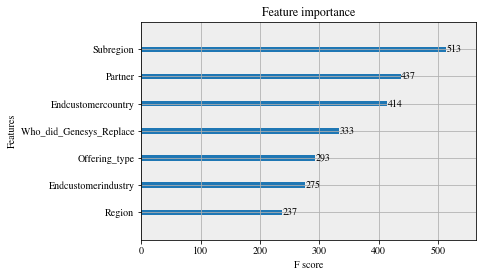

In [19]:
print('\033[1m  With full data \033[0m')
fullpredxgb = xgb.predict(X_full)
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score
print("Confusion Matrix")
print(confusion_matrix(y_full,fullpredxgb))
print("Classificaiton report")
print(classification_report(y_full,fullpredxgb))

print("Accuracy report")
print(accuracy_score(y_full,fullpredxgb))

# plot feature importance
xgboost.plot_importance(xgb)

In [20]:
train2.columns

Index(['Region', 'Subregion', 'Endcustomercountry', 'Endcustomerindustry',
       'Partner', 'Offering_type', 'Primary_Play', 'Who_did_Genesys_Replace'],
      dtype='object')

In [21]:
data = [[3,57,41,22,2,6,7]] 
finaldata=pd.DataFrame(data, columns = list(X_test.columns)) 
result=xgb.predict(finaldata)
print(result)
labeldict['Primary_Play'].inverse_transform(list(result))

[2]


array(['2019 Play 3 Digital Service'], dtype=object)

In [22]:
print(xgb.predict_proba(finaldata))
listprimaryplay=list(train['Primary_Play'].unique())
print(list(leprimaryplay.inverse_transform(listprimaryplay)))
print(listprimaryplay)

[[0.07795238 0.02258895 0.59444606 0.04422835 0.09472837 0.16605587]]
['PureConnect', '2019 Play 2 Cloud for Midmarket', '2019 Play 1 PureBridge', '2019 Play 4 Digital Sales', '2019 Play 3 Digital Service', '2019 Play 5 Automation at Work', 'Avtex ']
[6, 1, 0, 3, 2, 4, 5]
